<h1 style="color: green;">LOGISTIC REGRESSION</h1>

Logistic regression is a statistical method used for binary classification, which is the process of predicting a binary outcome (0 or 1, yes or no, true or false) based on one or more predictor variables. It's a type of generalized linear model that extends linear regression to cases where the target variable is categorical rather than continuous.

Key Concepts in Logistic Regression
Sigmoid Function: Logistic regression uses the sigmoid (or logistic) function to map predicted values to probabilities between 0 and 1. The sigmoid function is defined as:
𝜎(𝑥)=1/(1+𝑒^-x)

Decision Boundary: Once the probabilities are obtained, a threshold (usually 0.5) is applied to decide the class label. For example, if the probability is greater than 0.5, the model might classify the instance as 1 (or "yes"), otherwise 0 (or "no").

Steps to Train a Logistic Regression Model
Prepare Data:

Ensure the dataset is clean, with relevant features and a binary target.
Split the data into training and test sets.
Fit the Model:

Use maximum likelihood estimation to estimate the parameters (β) that maximize the probability of the observed outcomes.
Make Predictions:

Compute the probability of the positive class using the sigmoid function.
Apply a decision threshold to classify the result.
Evaluate the Model:

Metrics like accuracy, precision, recall, F1-score, and the Area Under the Receiver Operating Characteristic (ROC-AUC) are commonly used.
Regularization (Optional):

Regularization (like L1 or L2 regularization) can be added to penalize large coefficients, which helps prevent overfitting.
Applications of Logistic Regression
Logistic regression is widely used for:

Disease prediction (e.g., predicting the likelihood of a medical condition).
Customer churn prediction.
Spam detection.
Credit scoring.
​


In [100]:
# LOADING OF NECESSARY PACKAGES
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats


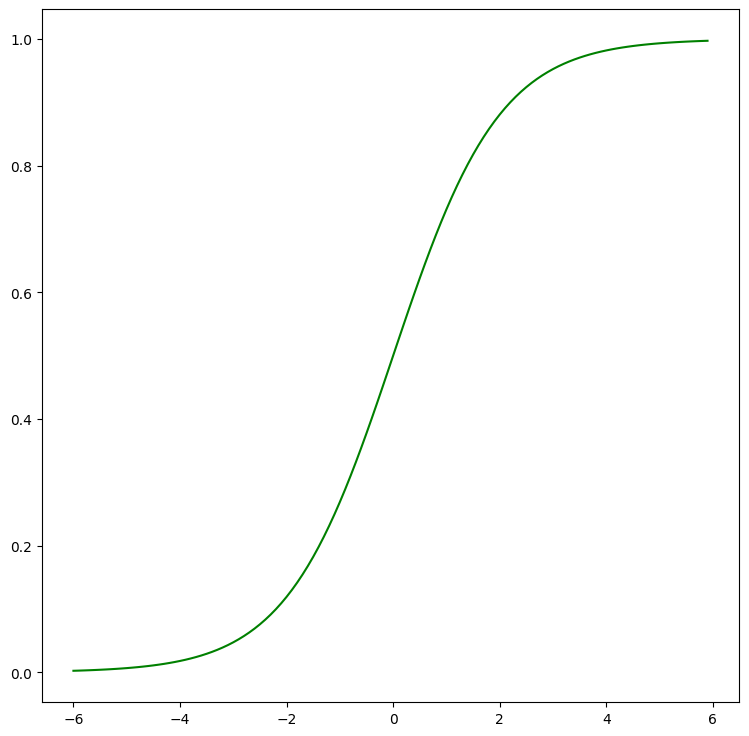

In [101]:
plt.figure(figsize=(9,9))
def sigmoid(t):
    return(1/(1+np.exp(-t)))
plot_range=np.arange(-6,6,0.1)
y_values=sigmoid(plot_range)

#plot curve
plt.plot(plot_range,
         y_values,
         color='green')

<h2 style="color: green;">PREDICTING THE NUMBER OF SURVIVORS IN THE TITANIC DISASTER</h2>

In [102]:
df=pd.read_csv(r"C:\Users\s.mburiri\Downloads\titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [43]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [58]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [103]:
chr_cabin=df['Cabin'].astype(str) #convert cabin to str
new_cabin=np.array([cabin[0]for cabin in chr_cabin]) # take first letter
df['Cabin']=pd.Categorical(new_cabin) #save the new cabin var
# replace null age vlues with the median
new_age_var=np.where(df['Age'].isnull,28,df['Age'])
df['Age']=new_age_var

new_fare_var=np.where(df['Fare']==0,50,df['Fare'])
df['Fare']=new_fare_var

chr_embarked=df['Embarked'].astype(str) #convert embarked to str
new_embarked=np.array([embarked[0]for embarked in chr_embarked]) # take first letter
df['Embarked']=pd.Categorical(new_embarked) #save the new embarked var

In [104]:
from sklearn import linear_model
from sklearn import preprocessing

In [105]:
#initialize label encorder\
label_encoder=preprocessing.LabelEncoder()
# convert sex variable to nueric
encoded_sex=label_encoder.fit_transform(df['Sex'])
encoded_sex= encoded_sex.reshape(-1, 1)  # Reshape to 2D if it's 1D

# initialize the logistic regression model
log_model=linear_model.LogisticRegression(solver='lbfgs')
#train the model
log_model.fit(encoded_sex,
              df['Survived'])
# check trained model intercept
print(log_model.intercept_)
# check trained model coefficient
print(log_model.coef_)


[1.01693725]
[[-2.44646935]]


In [106]:
#make some predictions
preds=log_model.predict_proba(encoded_sex)
preds=pd.DataFrame(preds)
preds.columns=['death_prob','survival_prob']

#generate table of predictions vs sex
pd.crosstab(df['Sex'],preds['survival_prob'])

survival_prob,0.193172,0.734376
Sex,,
female,0,314
male,577,0


# use model.predict_proba() to get the predicted class probabilities and use model.predict() to predict to get predicted classes
this shows a 19% survival rate for males and 73% survival rate for females. by this model we would predict that all males died abd all females survived.
    lets make a model that incorporates more variables from the dataset.

In [107]:
#convert more variables to numeric
encoded_class=label_encoder.fit_transform(df['Pclass'])
encoded_cabin=label_encoder.fit_transform(df['Cabin'])

train_features=pd.DataFrame([encoded_cabin,
                             encoded_class,
                             encoded_sex,
                             df['Age']]).T
#initialize the logistic regression model
log_model=linear_model.LogisticRegression(solver="lbfgs")
# train the model
log_model.fit(train_features,df['Survived'])
#check tarined model intercept
print(log_model.intercept_)
#check trained model coefficient
print(log_model.coef_)


[0.00343024]
[[-0.08914025 -0.74292021 -2.55263364  0.09277365]]


In [109]:
# make predictions
pred=log_model.predict(train_features)
# generate table of predictions vs actual
pd.crosstab(pred,df['Survived'])

Survived,0,1
row_0,,
0,460,103
1,89,239


The table above shows the predicted classes vs the actual survival variables.the table is called a confussion matrix.

# how well did the model predict

In [110]:
log_model.score(train_features,df['Survived'])

0.7845117845117845

In [111]:
from sklearn import metrics
metrics.confusion_matrix(y_true=df['Survived'],
                         y_pred=pred)

array([[460,  89],
       [103, 239]])

In [81]:
#view summary of common classification metrics
print(metrics.classification_report(y_true=df['Survived'],
                         y_pred=pred))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       549
           1       0.73      0.70      0.71       342

    accuracy                           0.78       891
   macro avg       0.77      0.77      0.77       891
weighted avg       0.78      0.78      0.78       891




The classification report provides a summary of precision, recall, F1-score, and support for each class in your binary classification model. Let’s interpret each part of the output for this particular case.

### Understanding Each Metric

1. **Class 0 and Class 1**:
   - Class `0` (often represents the negative class, like "did not survive") and Class `1` (positive class, like "survived") are evaluated separately.

2. **Precision**:
   - Precision is the ratio of true positives to the sum of true positives and false positives.
   - **Class 0 Precision (0.82)**: When the model predicts Class 0, it is correct 82% of the time.
   - **Class 1 Precision (0.73)**: When the model predicts Class 1, it is correct 73% of the time.

3. **Recall**:
   - Recall is the ratio of true positives to the sum of true positives and false negatives.
   - **Class 0 Recall (0.84)**: Out of all actual Class 0 instances, the model correctly identifies 84% of them.
   - **Class 1 Recall (0.70)**: Out of all actual Class 1 instances, the model correctly identifies 70% of them.

4. **F1-score**:
   - F1-score is the harmonic mean of precision and recall, balancing the two metrics.
   - **Class 0 F1-score (0.83)**: This combines the model’s precision and recall for Class 0.
   - **Class 1 F1-score (0.71)**: This combines the model’s precision and recall for Class 1.
   - The F1-score for Class 0 is higher than for Class 1, indicating the model performs better in predicting Class 0 than Class 1.

5. **Support**:
   - Support is the number of actual occurrences of each class in the test set.
   - **Class 0 Support (549)**: There are 549 actual instances of Class 0.
   - **Class 1 Support (342)**: There are 342 actual instances of Class 1.

### Overall Metrics

1. **Accuracy (0.78)**:
   - This is the overall accuracy of the model, calculated as the proportion of correctly predicted instances out of the total instances.
   - Here, the accuracy is 78%, meaning the model correctly classified 78% of all instances.

2. **Macro Average**:
   - Macro average calculates the unweighted mean of precision, recall, and F1-score for both classes, treating them equally.
   - **Macro Avg Precision/Recall/F1-score (0.77)**: This shows the average model performance across both classes without considering class imbalance.

3. **Weighted Average**:
   - Weighted average calculates the mean of precision, recall, and F1-score, weighted by support for each class.
   - **Weighted Avg Precision/Recall/F1-score (0.78)**: This gives a more balanced view that accounts for the class imbalance (more Class 0 instances).

### Interpretation Summary

- The model has an overall accuracy of 78%, with slightly better performance in predicting Class 0 (precision: 0.82, recall: 0.84) than Class 1 (precision: 0.73, recall: 0.70).
- The precision and recall for Class 0 suggest the model is better at identifying non-survivors than survivors, as evidenced by the lower scores for Class 1.
- The weighted average F1-score of 0.78 suggests the model maintains a reasonable balance between precision and recall overall, although it could improve on identifying Class 1 instances.

This output indicates a model that is generally effective but could potentially be improved, especially in detecting the positive class.

# using the logistic regression model to  make a submission for the titanic disaster

In [112]:
df2=df.drop(columns='Survived')
df2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,28.0,1,0,A/5 21171,7.2500,n,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,28.0,1,0,PC 17599,71.2833,C,C
2,3,3,"Heikkinen, Miss. Laina",female,28.0,0,0,STON/O2. 3101282,7.9250,n,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,28.0,1,0,113803,53.1000,C,S
4,5,3,"Allen, Mr. William Henry",male,28.0,0,0,373450,8.0500,n,S


In [113]:
chr_cabin=df2['Cabin'].astype(str) #convert cabin to str
new_cabin=np.array([cabin[0]for cabin in chr_cabin]) # take first letter
df2['Cabin']=pd.Categorical(new_cabin) #save the new cabin var
# replace null age vlues with the median
new_age_var=np.where(df2['Age'].isnull,28,df2['Age'])
df2['Age']=new_age_var

new_fare_var=np.where(df2['Fare']==0,50,df2['Fare'])
df2['Fare']=new_fare_var

chr_embarked=df2['Embarked'].astype(str) #convert embarked to str
new_embarked=np.array([embarked[0]for embarked in chr_embarked]) # take first letter
df2['Embarked']=pd.Categorical(new_embarked) #save the new embarked var

In [114]:
#convert more variables into numeric
encoded_class=label_encoder.fit_transform(df2['Pclass'])
encoded_sex=label_encoder.fit_transform(df2['Sex'])
encoded_cabin=label_encoder.fit_transform(df2['Cabin'])

In [115]:
train_features=pd.DataFrame([encoded_sex,
                             encoded_class,
                             encoded_cabin,
                             df2['Age']]).T

In [117]:
# make test set predictions
test_predictions=log_model.predict(train_features)
# create submission for kaggle
submission=pd.DataFrame({'PassengerId':df['PassengerId'],
                         'Survived': test_predictions})
#save submission to CSV
submission.to_csv("tutorial_logreg_submission.csv",index=False)
                         

In [121]:
print(submission.head(30))

    PassengerId  Survived
0             1         0
1             2         0
2             3         0
3             4         0
4             5         0
5             6         0
6             7         0
7             8         0
8             9         0
9            10         0
10           11         0
11           12         0
12           13         0
13           14         0
14           15         0
15           16         0
16           17         0
17           18         0
18           19         0
19           20         0
20           21         0
21           22         0
22           23         0
23           24         1
24           25         0
25           26         0
26           27         0
27           28         0
28           29         0
29           30         0
